# Analiza statystyczna produkcji miodu w Ameryce w latach 1

## 0. Import danych

Dane pobrane zostały ze strony Kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)

%matplotlib inline
np.random.seed(42)

Nazwy kolumn zostały zmienione w celu zapewnienia wygody w trakcie pisania funkcji służących analizie danych. Zmienione zostały również nazwy stanów, aby ułatwić czytelność, oraz została dodana kolumna 'Consumption' wskazująca ilość spożywanego miodu.

In [7]:
data = pd.read_csv("honeyproduction.csv").rename(columns={
    'state':'state_code',
    'num_of_col':'n_colony',
    'yield_per_col':'production_per_colony',
    'total_prod':'total_production',
    'stocks':'stock_held',
    'price_per_lb':'price_per_lb',
    'prod_value':'total_production_value'
})

state_code_to_name = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
data['consumption'] = data['total_production'] - data['stock_held']
data['state'] = data['state_code'].apply(lambda x: state_code_to_name[x])

Przykładowe dane z tabeli:

In [5]:
data.sample(5)

,state_code,n_colony,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year,consumption,state
448,NJ,9000,40,360000.0,122000,1.78362,641883.0,2008,238000.0,New Jersey
486,MT,146000,70,10220000.0,3577000,1.61330,16487705.0,2009,6643000.0,Montana
215,WI,70000,95,6650000.0,2461000,1.76478,11735787.0,2002,4189000.0,Wisconsin
212,VA,8000,38,304000.0,79000,2.50230,761226.0,2002,225000.0,Virginia
481,ME,6000,50,300000.0,51000,2.15475,646425.0,2009,249000.0,Maine


## 1. Wstępna analiza danych.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
state_code                626 non-null object
n_colony                  626 non-null int64
production_per_colony     626 non-null int64
total_production          626 non-null float64
stock_held                626 non-null int64
price_per_lb              626 non-null float64
total_production_value    626 non-null float64
year                      626 non-null int64
consumption               626 non-null float64
state                     626 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 49.0+ KB


Poniżej znajduje się histogram przedstawiający dystrybucje danych.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d517ec4a8>,
      dtype=object)

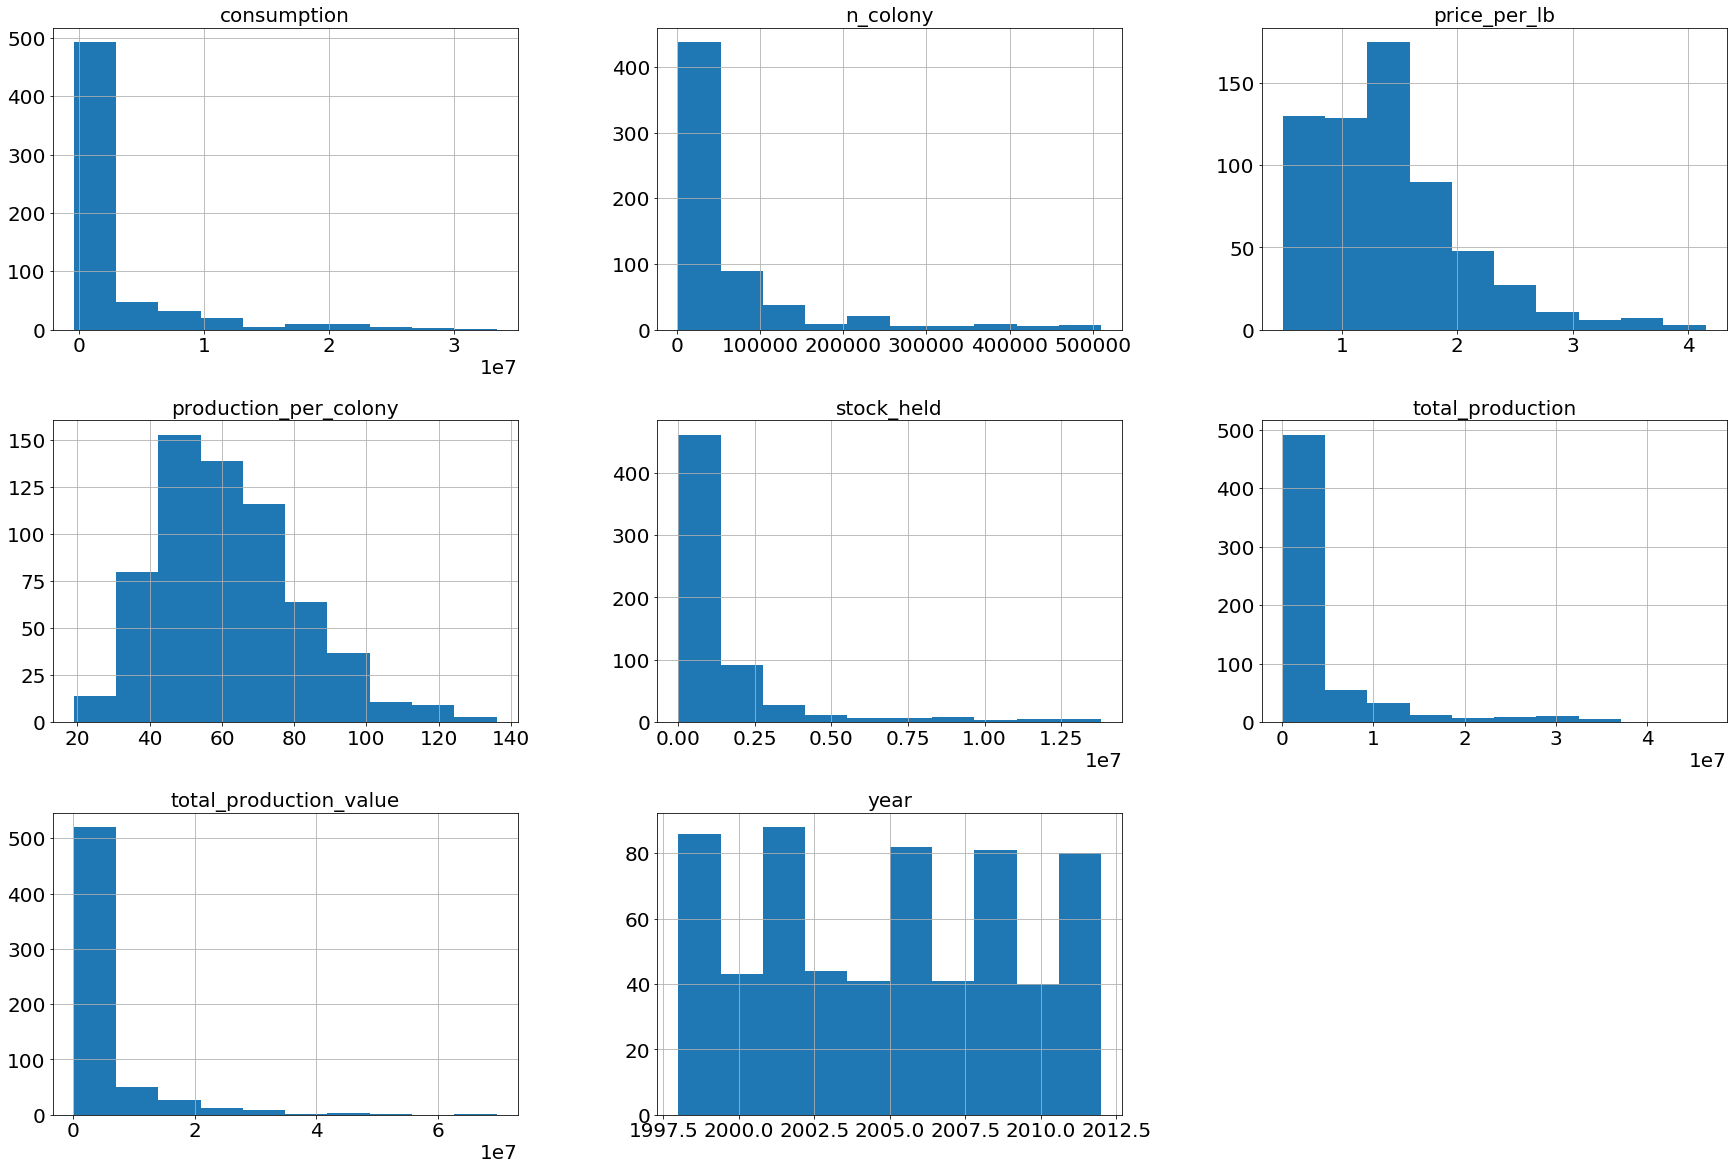

In [19]:
data.hist(xlabelsize = 20, ylabelsize = 20, figsize = (30,20))

In [19]:
data.columns

Index(['state_code', 'n_colony', 'production_per_colony', 'total_production',
       'stock_held', 'price_per_lb', 'total_production_value', 'year',
       'consumption', 'state'],
      dtype='object')

In [20]:
data.dtypes

state_code                 object
n_colony                    int64
production_per_colony       int64
total_production          float64
stock_held                  int64
price_per_lb              float64
total_production_value    float64
year                        int64
consumption               float64
state                      object
dtype: object

Warto sprawdzić czy któraś z tabel nie zawiera dużych ilości wartości NaN, co zaburzałoby wiarygodność wyników.

In [22]:
data.isnull().sum(axis=0)

state_code                0
n_colony                  0
production_per_colony     0
total_production          0
stock_held                0
price_per_lb              0
total_production_value    0
year                      0
consumption               0
state                     0
dtype: int64

Ponieważ często dane będą kategoryzowane przez pryzmat stanów warto również upewnić się, że każdy z nich zawiera podobną ilość danych.

In [25]:
data.groupby('state').size()

state
Alabama           15
Arizona           15
Arkansas          15
California        15
Colorado          15
Florida           15
Georgia           15
Hawaii            15
Idaho             15
Illinois          15
Indiana           15
Iowa              15
Kansas            15
Kentucky          15
Louisiana         15
Maine             15
Maryland           6
Michigan          15
Minnesota         15
Mississippi       15
Missouri          15
Montana           15
Nebraska          15
Nevada            11
New Jersey        15
New Mexico        15
New York          15
North Carolina    15
North Dakota      15
Ohio              15
Oklahoma           6
Oregon            15
Pennsylvania      15
South Carolina     3
South Dakota      15
Tennessee         15
Texas             15
Utah              15
Vermont           15
Virginia          15
Washington        15
West Virginia     15
Wisconsin         15
Wyoming           15
dtype: int64

Jak widać trzy ze stanów - Maryland, Oklahoma, South Carolina - zawierają znacząco mniej rekordów. Należy więc usunąć je z tabeli, aby wyniki nie były przekłamane.

In [26]:
data = data[data.state != 'Maryland']
data = data[data.state != 'Oklahoma']
data = data[data.state != 'South Carolina']

## 2.Analiza globalna.

Na początku warto sprawdzić jak na przestrzeni lat zachowywały się ceny miodu.

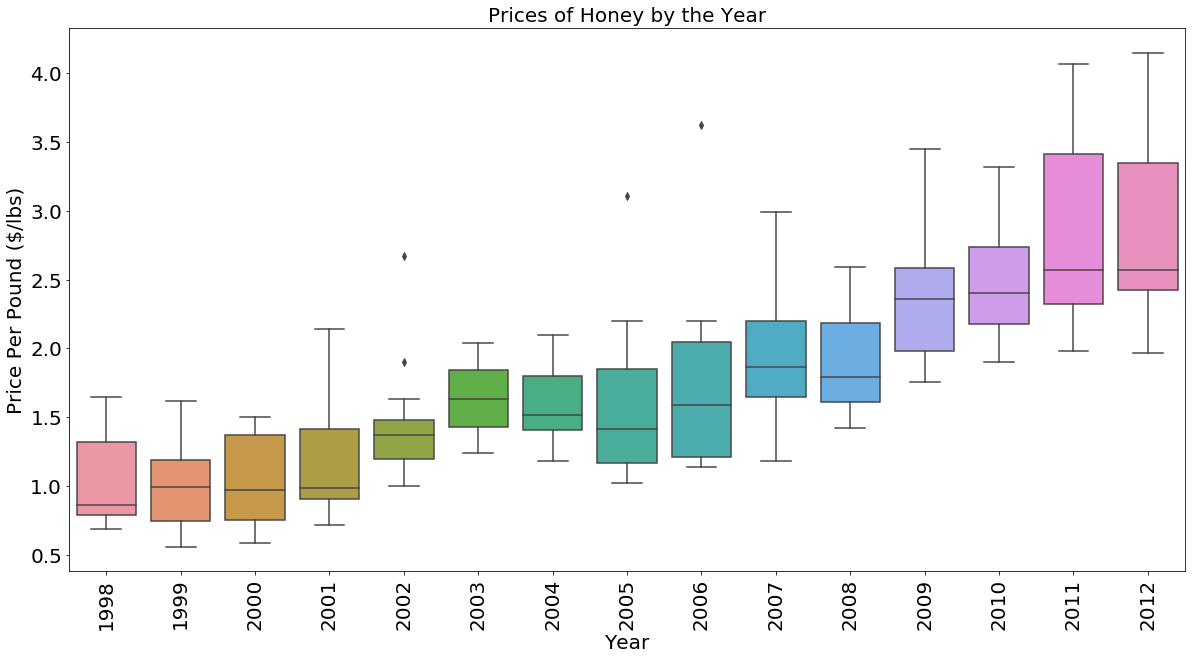

In [23]:
df_states_consumption = data.loc[data['state'].isin(list(data[['state','price_per_lb']].groupby('state').sum().sort_values(by='price_per_lb', ascending=False).head(16).reset_index().state.values))]
df_prices_by_year = data[['year','price_per_lb']]
plt.figure(figsize=(20,10))
sns.boxplot(data=df_states_consumption, x='year',y='price_per_lb')
plt.title("Prices of Honey by the Year")
plt.ylabel("Price Per Pound ($/lbs)")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.show()

Jak widać z powyższego wykresu pudełkowego ceny miodu mają tendencję rosnącą, oczywiście nie biorąc pod uwagę zmiany kursu pieniądza. Dodatkowo można zauważyć, że najmniejszy rozbieg cen następował w 2002 roku, a największy w roku 2011.

Warto również przyjrzeć się produkcji oraz konsumpcji na przestrzeni lat.

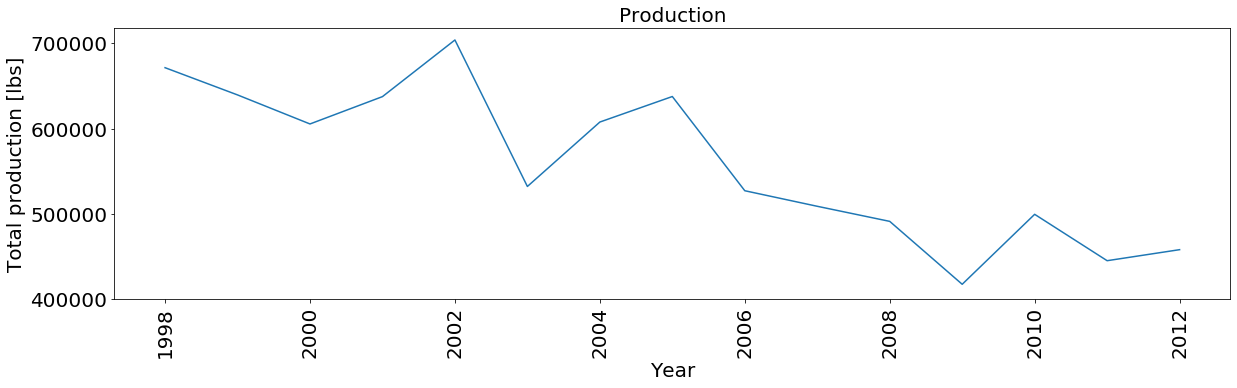

In [41]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_states_consumption, x = 'year', y = 'total_production', err_style="bars", ci=0)
plt.title('Production')
plt. ylabel('Total production [lbs]')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

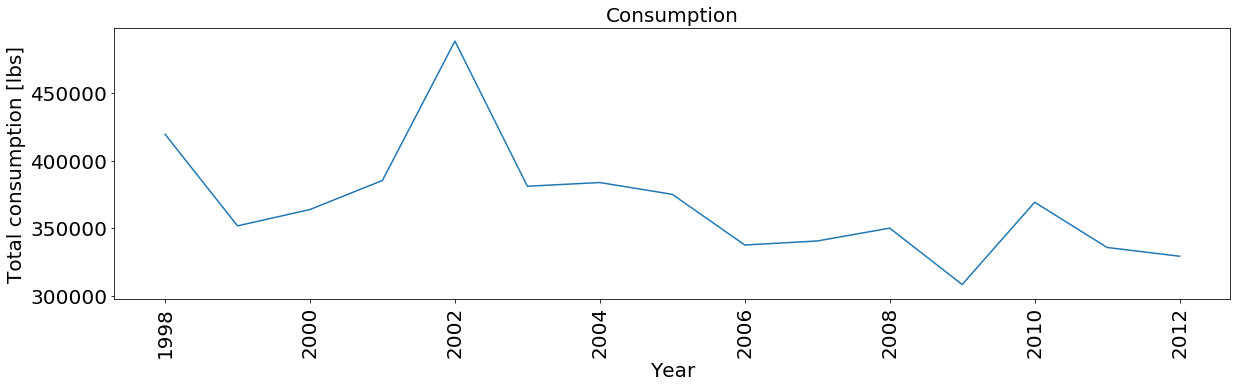

In [42]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_states_consumption, x = 'year', y = 'consumption', err_style="bars", ci=0)
plt.title('Consumption')
plt. ylabel('Total consumption [lbs]')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

Jak wydać z poniższych wykresów oba wykresy mają tendencję malejącą. Warto zestawić dane, aby sprawdzić jak duża część produkowanego miodu jest konsumowana.

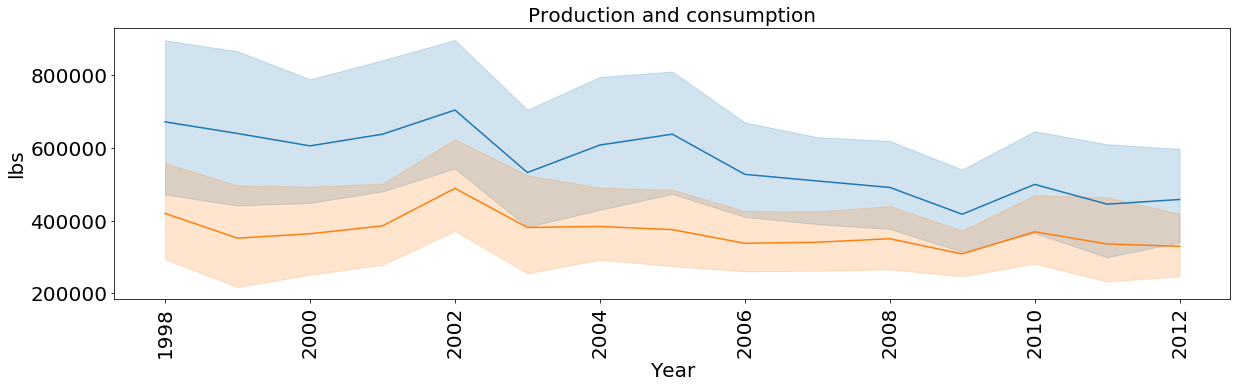

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_states_consumption, x = 'year', y = 'total_production')
sns.lineplot(data = df_states_consumption, x = 'year', y = 'consumption')
plt.title('Production and consumption')
plt. ylabel('lbs')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

Jak widać z powyższego wykresu nie ma roku, w którym konsumpcja równa się produkcji - tłumaczy to spadek produkcji na przestrzeni lat.

Dodatkowo warto zwrócić uwagę na wartość całkowitą produkcj - widać z poniższego wykresu, że ma ona tendencję wzrostową. Ta informacja zgadza się z poprzednimi wykresami - cena na przestrzeni lat rośnie, a produkcja maleje. Wzrost ceny jest jednak na tyle wysoki, że całkowity zysk zwiększa się z roku na rok.

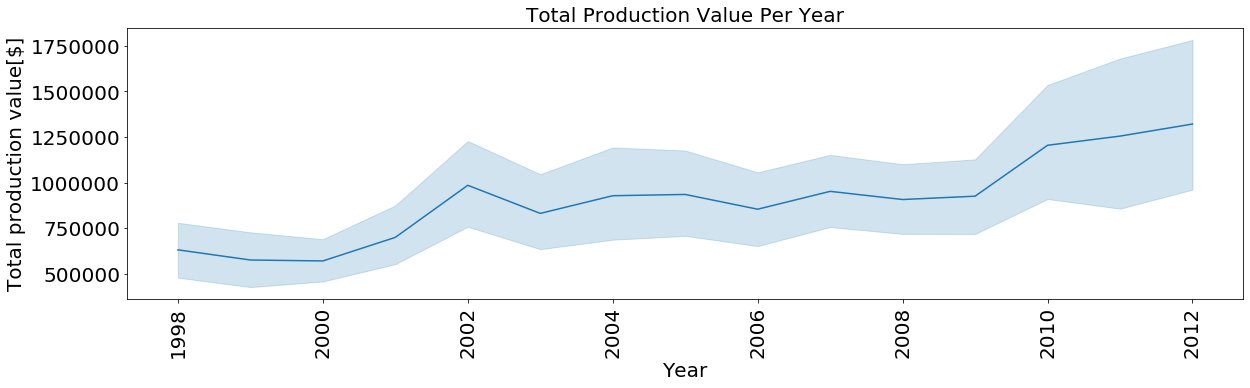

In [45]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_states_consumption, x = 'year', y = 'total_production_value')
plt.title('Total Production Value Per Year')
plt. ylabel('Total production value[$]')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

Następnie zajmiemy się rozpatrzeniu produkcji i konsumpcji miodu w zależności od stanu.

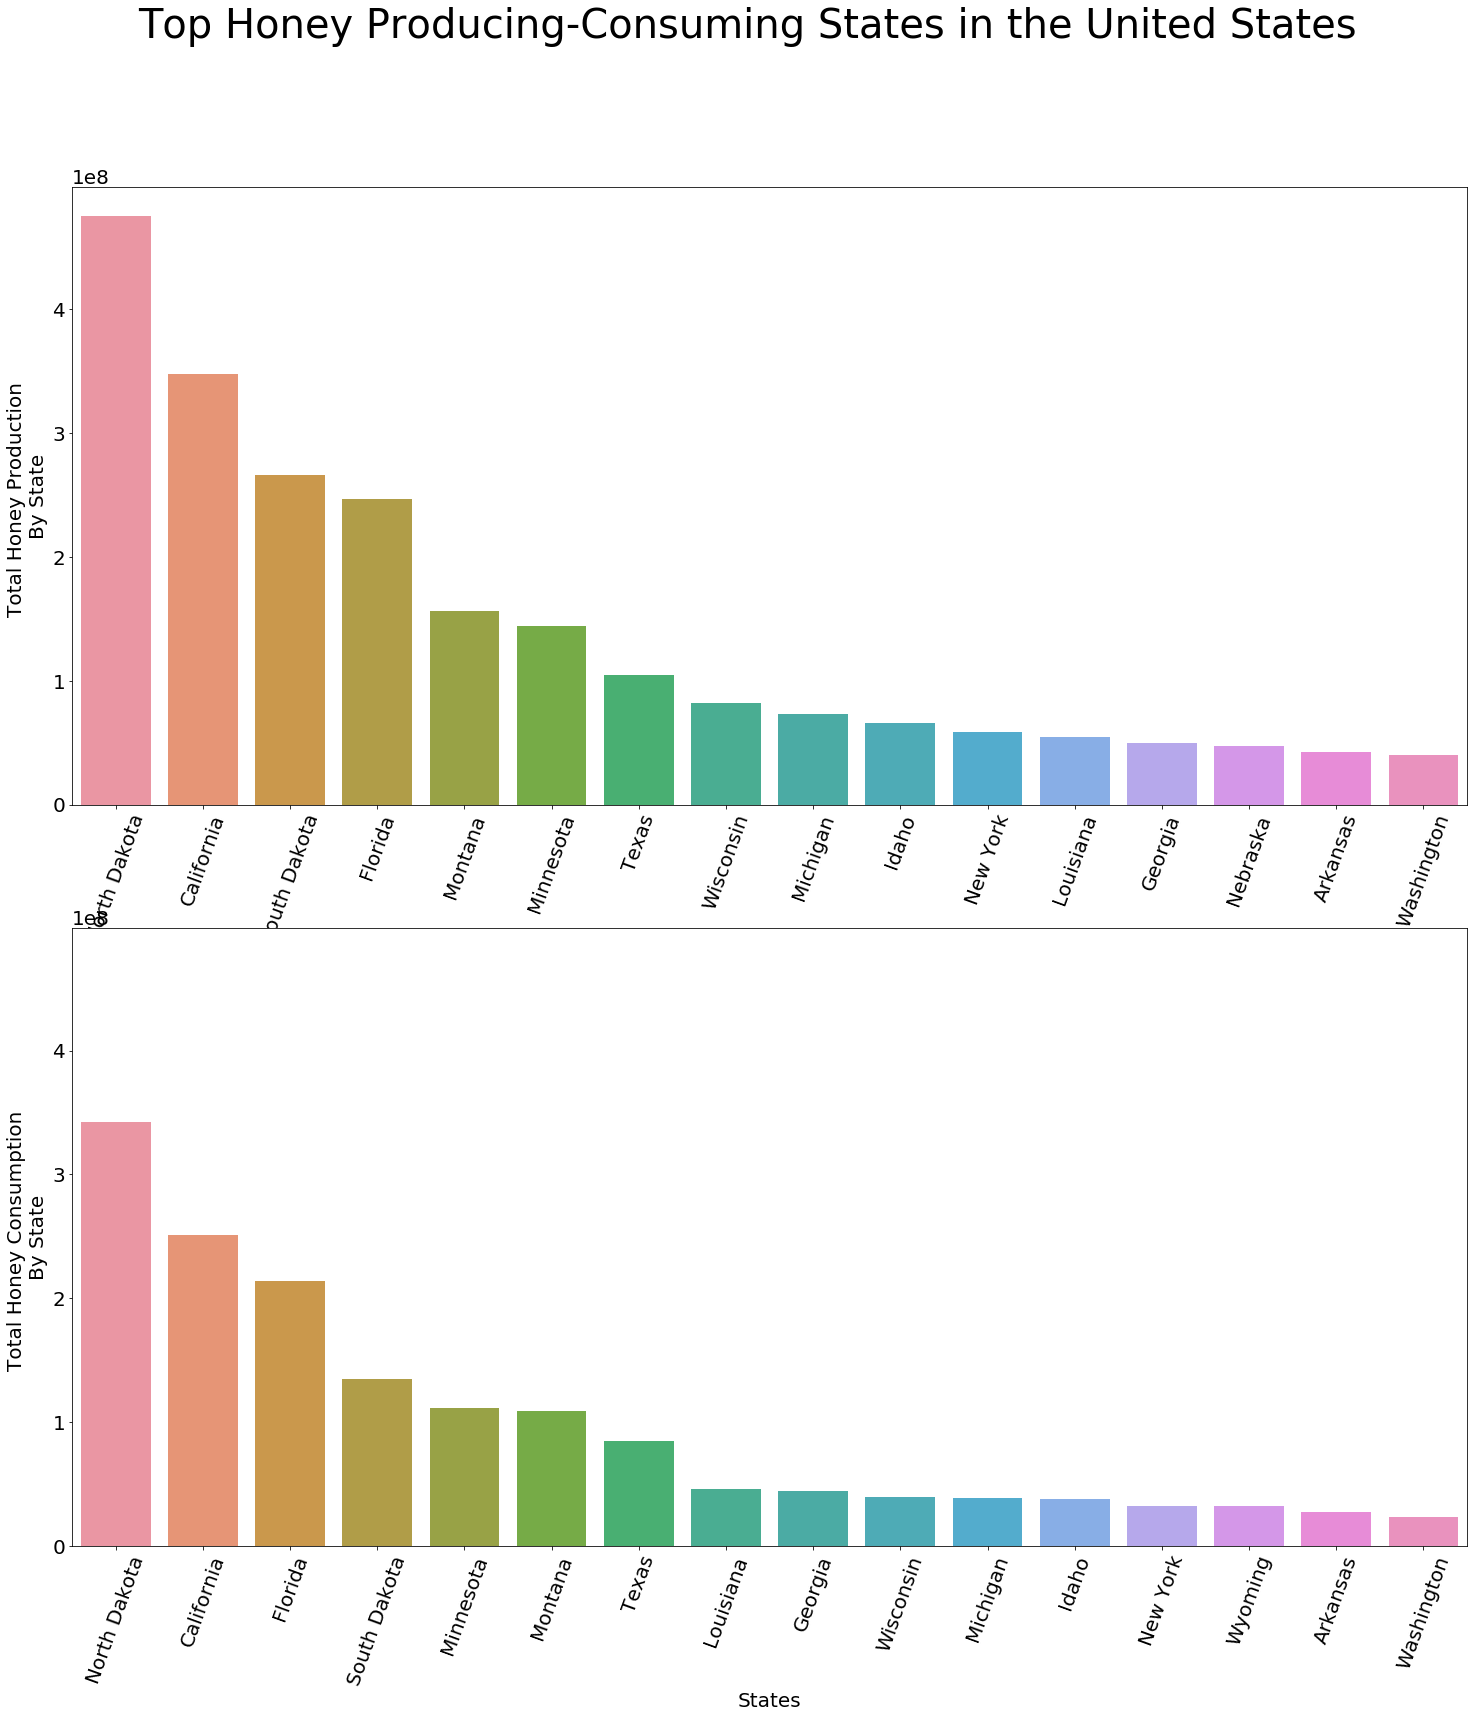

In [27]:
states_by_production = data[['state','total_production']].groupby('state').sum().sort_values(by='total_production', ascending=False).head(16).reset_index()
states_by_consumption = data[['state','consumption']].groupby('state').sum().sort_values(by='consumption', ascending=False).head(16).reset_index()

f, (ax1,ax2) = plt.subplots(2,1, figsize = (25,25), sharey=True)

plt.suptitle("Top Honey Producing-Consuming States in the United States", fontsize = 40)
sns.barplot(data=states_by_production, x='state', y='total_production', ax=ax1)
ax1.set(xlabel='States', ylabel='Total Honey Production \nBy State')
sns.barplot(data=states_by_consumption, x='state', y='consumption', ax=ax2)
ax2.set(xlabel='States', ylabel='Total Honey Consumption \nBy State')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
plt.show()

states_production = data[['state','total_production']].groupby('state').sum().sort_values(by='total_production', ascending=False).reset_index()
states_production_dict = dict(zip(states_production.state, states_production.total_production))

        
plt.show()

Jak widać z powyższych wykresów najbardziej miododajnym stanem jest North Dakota, najmniej natomiast produkuje oraz konsumuje Washington.

Przy okazji można sprawdzić, jak cenny jest miód w poszczególnych stanach. Widać, że drogi jest on w Nevadzie i Virginii, tanio można go natomiast zdobyć w takich stanach jak Alabama, Hawaje, New Jersey oraz Vermont.

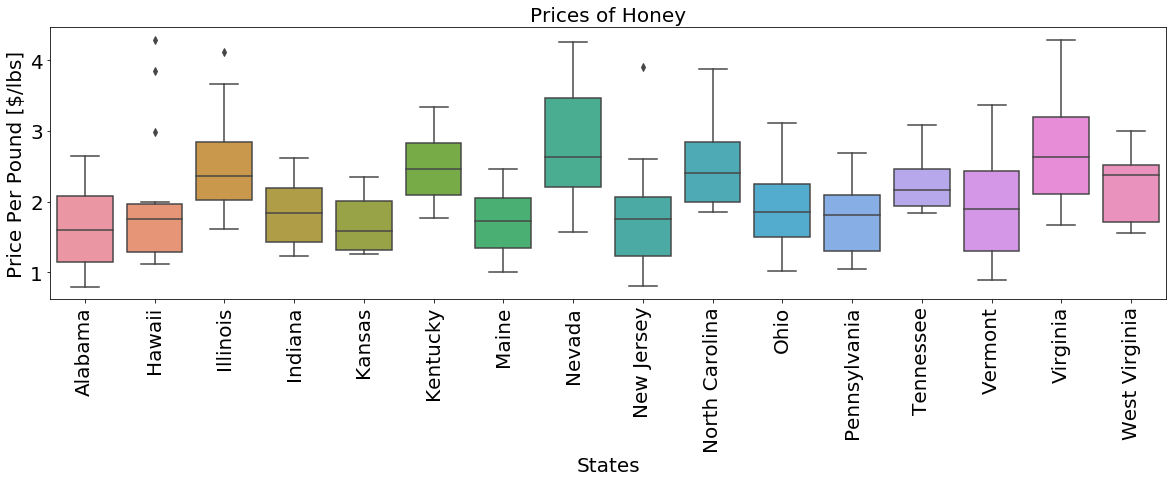

In [68]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df_states_consumption, x = 'state', y = 'price_per_lb')
plt.title('Prices of Honey')
plt. ylabel('Price Per Pound [$/lbs]')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

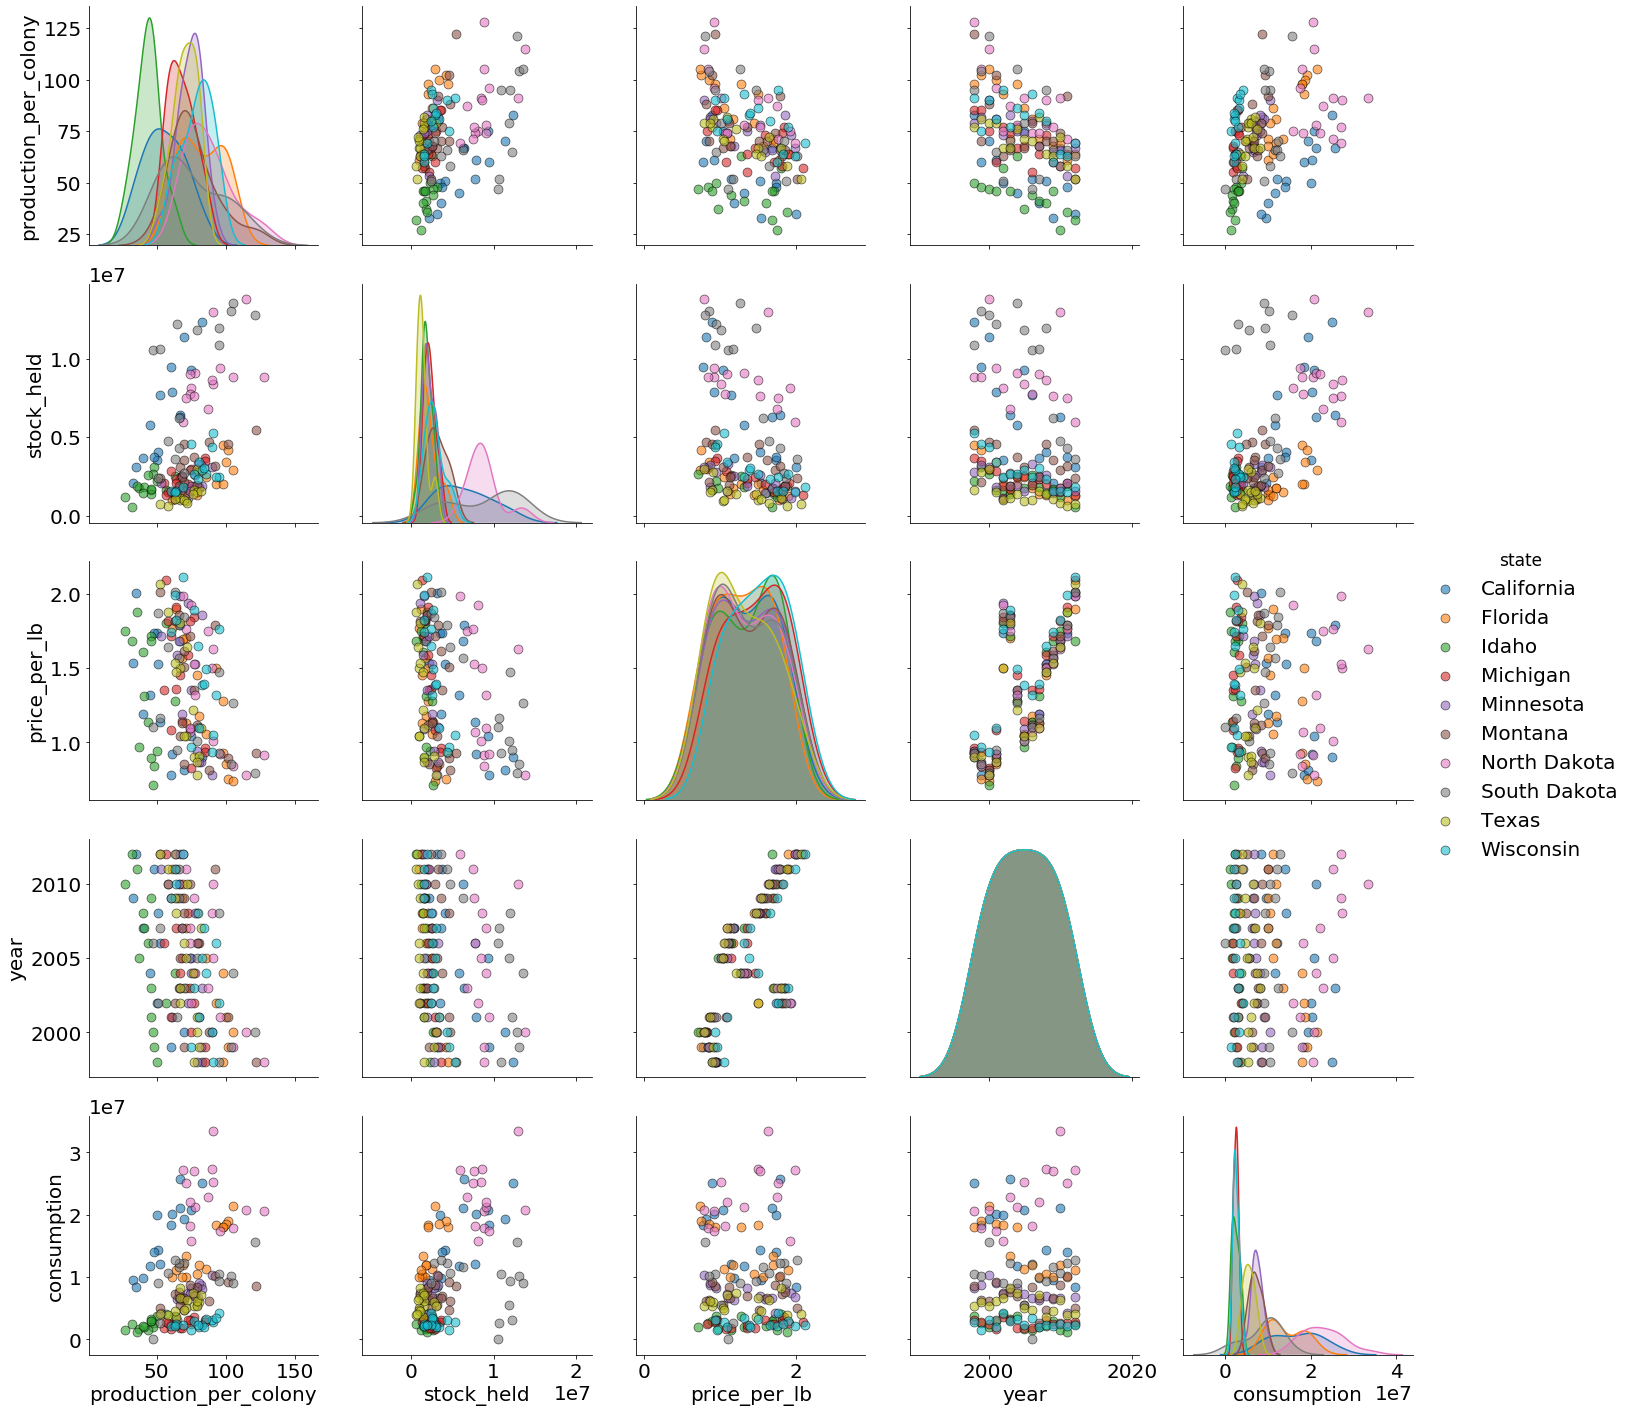

In [71]:
sns.pairplot(data.loc[data['state'].isin(list(top10_states_by_production.state))], hue='state',
            diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
            height=4, vars = ['production_per_colony','stock_held','price_per_lb','year','consumption'])